In [69]:
import numpy as np
import pandas as pd

In [70]:
df = pd.read_csv('pca.csv', encoding='ISO-8859-1')

In [71]:
df.head()

,x,y
0,-31.869945,33.001252
1,0.764494,56.842901
2,-57.408276,13.124961
3,-2.168543,53.478590
4,-32.174085,30.388412


In [72]:
for row in df:
    data = df.values
print(data)

[[-3.18699448e+01  3.30012521e+01]
 [ 7.64494048e-01  5.68429006e+01]
 [-5.74082757e+01  1.31249607e+01]
 [-2.16854252e+00  5.34785900e+01]
 [-3.21740846e+01  3.03884119e+01]
 [-2.17695183e+00  5.22272685e+01]
 [-5.90656895e+01  9.54376302e+00]
 [ 1.23708622e+01  6.16180208e+01]
 [-6.63157690e+01  3.21423160e+00]
 [-5.65556212e+00  4.72672225e+01]
 [-5.82365979e+01  9.13418751e+00]
 [ 1.46218043e+01  6.21075685e+01]
 [-5.51608374e+01  1.00799251e+01]
 [-3.02878330e-03  5.01140754e+01]
 [-5.27646657e+01  1.16807468e+01]
 [ 1.94661180e+00  5.15222086e+01]
 [-3.45055496e+01  2.37615402e+01]
 [-7.30493262e+00  4.35151138e+01]
 [-4.12573070e+01  1.64734737e+01]
 [ 1.61902860e+01  5.83001207e+01]
 [-3.27400141e+01  2.13347966e+01]
 [-9.81885245e-01  4.44524038e+01]
 [-5.78100898e+01  1.87057486e+00]
 [-1.52712624e+00  4.28582471e+01]
 [-5.04819556e+01  3.56276971e+00]
 [ 7.69078091e+00  4.58600560e+01]
 [-3.46329913e+01  1.50715244e+01]
 [-9.94927953e+00  3.30225018e+01]
 [-3.38854915e+01  1

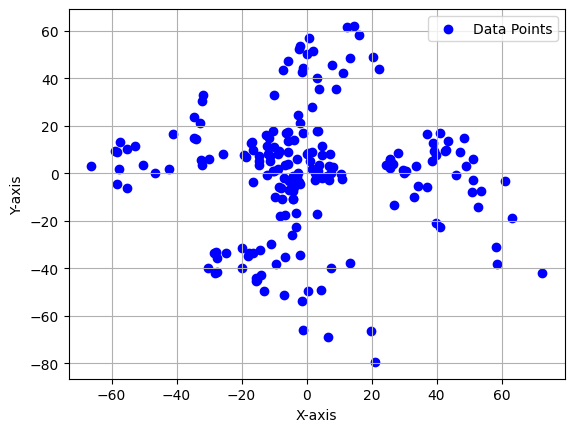

In [73]:
import matplotlib.pyplot as plt
import numpy as np
# Create the plot
plt.scatter(data[:, 0], data[:, 1], c='blue', label='Data Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

In [74]:
# calculate the distance
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

In [75]:
# assign points to clusters
def assign_data(clusters):
    for i in range(len(data)):
        dist = []
        curr_x = data[i]
        for j in range(k):
            temp = distance(curr_x,clusters[j]['center'])
            dist.append(temp)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters

In [76]:
# update new cluster
def update_clusters(clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if len(points) > 0:
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center
            clusters[i]['points'] = []
    return clusters

In [77]:
def predict_cluster(clusters):
    pred = []
    for i in range(len(data)):
        dist = []
        for j in range(k):
            dist.append(distance(data[i],clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred

In [80]:
# initialized the centers for K-means++
import random
import sys
def initialize(k):
    centers = []
    centers.append(data[np.random.randint(len(data)), :])
    for c in range(k - 1):
        dist = []
        for i in range(len(data)):
            point = data[i, :]
            d = sys.maxsize
            for j in range(len(centers)):
                temp_dist = distance(point, centers[j])
                d = min(d, temp_dist)
            dist.append(d)
        dist = np.array(dist)
        next_center = data[np.argmax(dist), :]
        centers.append(next_center)
        dist = []
    return centers


In [84]:
# find k using silhouette score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def find_k():
    range_k = [2, 3, 4, 5, 6, 7, 8]
    silhouette_avg = []
    for num in range_k:
        kmeans = KMeans(n_clusters=num, random_state=42, n_init=10)
        kmeans.fit(data)
        cluster_centers = kmeans.cluster_centers_
        labels = kmeans.labels_
        predicted_clusters = kmeans.predict(data)
        silhouette_avg.append(silhouette_score(data, predicted_clusters))

    plt.plot(range_k,silhouette_avg,'bx-')
    plt.xlabel('Values of K') 
    plt.ylabel('Silhouette score') 
    plt.title('Silhouette analysis For Optimal k')
    plt.show()
    
    max_score = np.argmax(silhouette_avg)
    return range_k[max_score]


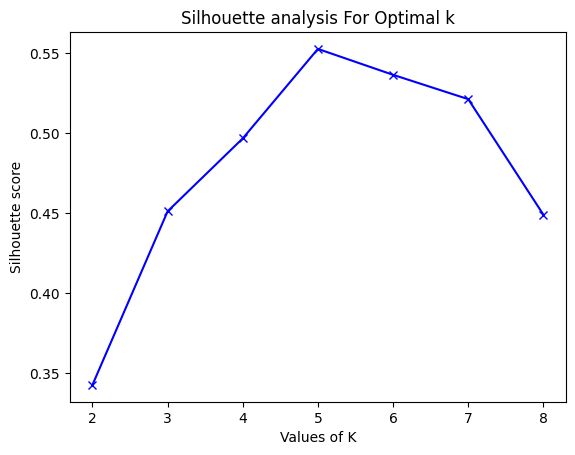

5


{0: {'center': array([ 58.52080418, -38.34603887]), 'points': []},
 1: {'center': array([-66.31576903,   3.2142316 ]), 'points': []},
 2: {'center': array([14.62180432, 62.10756847]), 'points': []},
 3: {'center': array([-13.16669561, -49.63885603]), 'points': []},
 4: {'center': array([-8.61369094,  9.21467482]), 'points': []}}

In [99]:
k = find_k()
print(k)
clusters = {}
center = initialize(k)
for i in range(k):
    points = []
    cluster = {
        'center' : center[i],
        'points' : []
    }   
    clusters[i] = cluster   
clusters

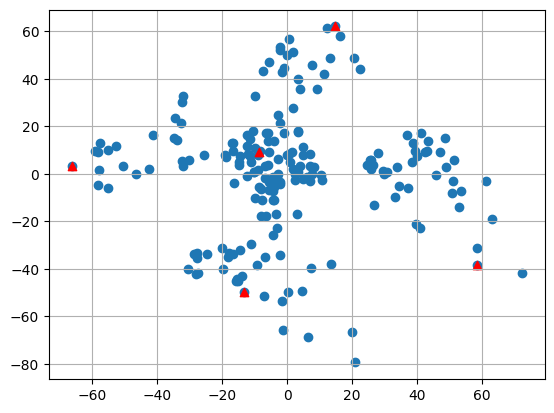

In [100]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(data[:,0],data[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()

In [101]:
flag = 0    
num_loop = 0
while flag==0:
    clusters = assign_data(clusters)
    list_center = []
    for j in range(k):
       list_center.append(clusters[j]['center'])
    clusters = update_clusters(clusters)
    pred = predict_cluster(clusters)
    temp=0
    for i in range(k):
        if np.array_equal(np.round(clusters[i]['center'], decimals=2), np.round(list_center[i], decimals=2)):
            temp+=1
    num_loop+=1
    if(temp==k):
        flag=1
print(num_loop)

4


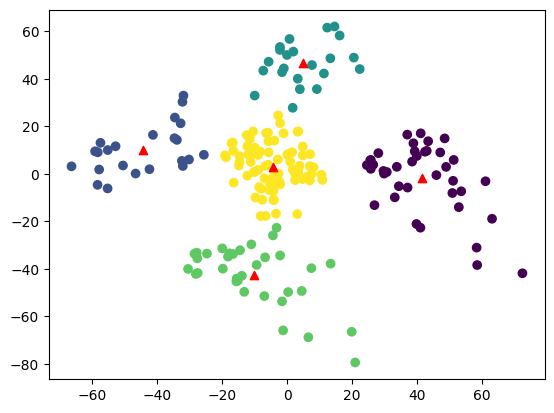

In [102]:
plt.scatter(data[:,0],data[:,1],c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()

In [103]:
from sklearn.metrics import silhouette_score
  
ss = silhouette_score(data, pred)
print(ss)

0.5526264331833406


In [104]:
# use KMeans in scikit-learn (sklearn)
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(data)
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_
predicted_clusters = kmeans.predict(data)


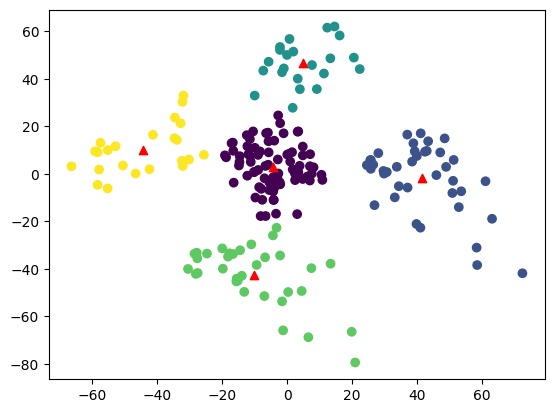

In [105]:
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='^')
plt.show()

In [106]:
from sklearn.metrics import silhouette_score
ss = silhouette_score(data, predicted_clusters)
print(ss)

0.5526264331833406
